In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Preprocessing

### 1. Data Understanding

In [37]:
df = pd.read_csv("Houses.csv")
display(df.head(30))
print(df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

(1460, 81)


In [50]:
df["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [4]:
df.drop(["Id"], axis=1, inplace=True)

### 2. Check for Dtypes

In [5]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,3,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [6]:
cols_to_change = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,category,category,float64,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,category,int64,int64,category,category,category,category,category,float64,category,category,category,category,category,category,category,int64,category,int64,int64,int64,category,category,category,category,int64,int64,int64,int64,category,category,category,category,category,category,category,int64,category,category,category,category,float64,category,category,int64,category,category,category,int64,int64,int64,int64,int64,category,category,category,category,int64,category,category,category,category,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,3,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


### 3. Null values

- **Check for Null Values**

In [7]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872.00000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.59726,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


- **Drop Null values**

In [8]:
c1 = "MasVnrType MasVnrArea Electrical".split()
df.dropna(subset=c1, inplace=True)

- **Replace Null values**

-
    - Replace with Mode for categorical columns

In [9]:
c2 = "BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageFinish GarageQual GarageCond".split()
modes = dict(df[c2].mode().iloc[0])

In [10]:
df.fillna(modes, inplace=True)

-
    - Replace with Median for numerical columns(due to distribution skewness)

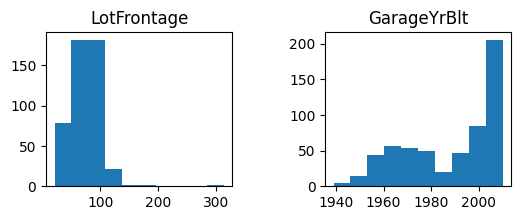

In [11]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("LotFrontage")
plt.hist(df["LotFrontage"])

plt.subplot(1, 2, 2)
plt.title("GarageYrBlt")
plt.hist(df["GarageYrBlt"])

plt.subplots_adjust(wspace=.5)
plt.show()

In [12]:
c2 = ["LotFrontage", "GarageYrBlt"]
medians = dict(df[c2].median())
medians

{'LotFrontage': np.float64(76.0), 'GarageYrBlt': np.float64(1995.5)}

In [13]:
df.fillna(medians, inplace=True)

- **Drop columns with high Null Ratio**

In [14]:
c3 = "Alley FireplaceQu PoolQC Fence MiscFeature".split()
df.drop(c3, axis=1, inplace=True)

- **Check for Null Values after handing Null values**

In [15]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Handle Outliers

- **Numerical columns**

In [16]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

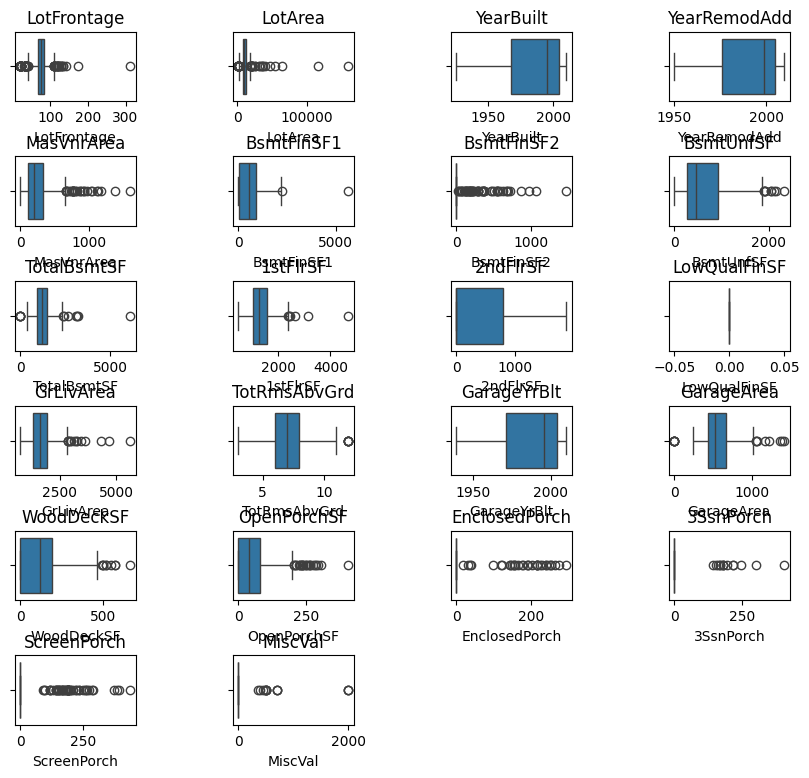

In [17]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [18]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

- **Categorical columns**
    - replace the outlier categories (which are categories that rarely occur) with the mode.

In [19]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

### 5. Visualization

In [20]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

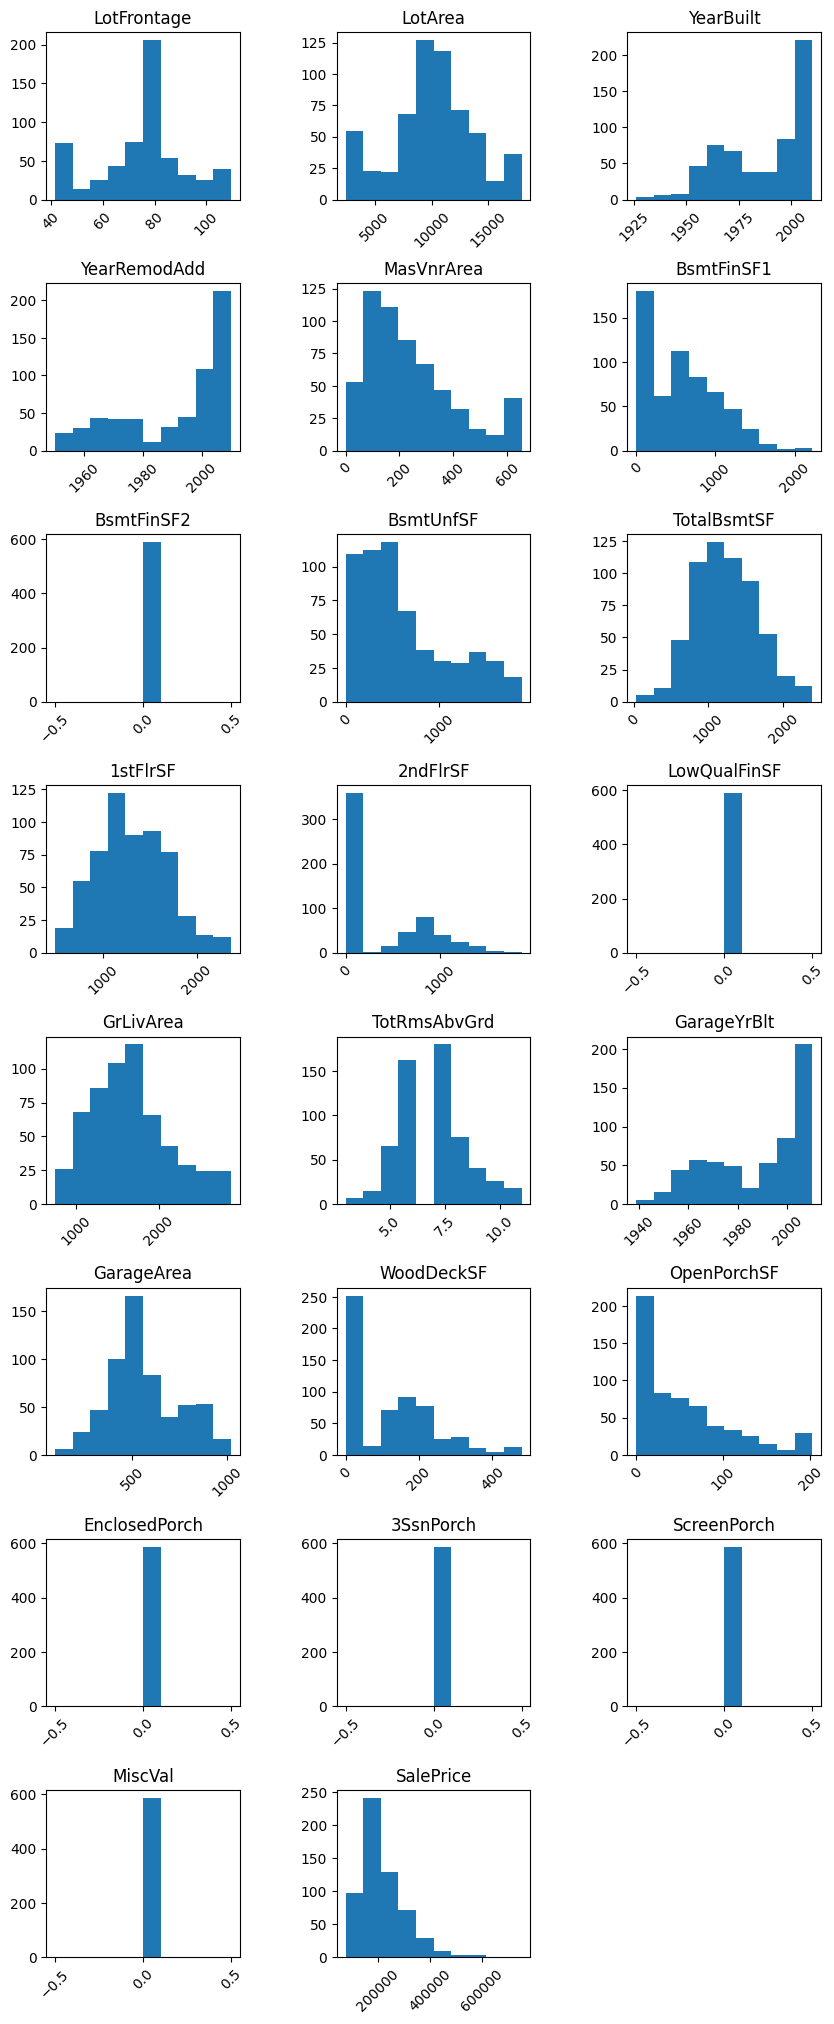

In [21]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [22]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

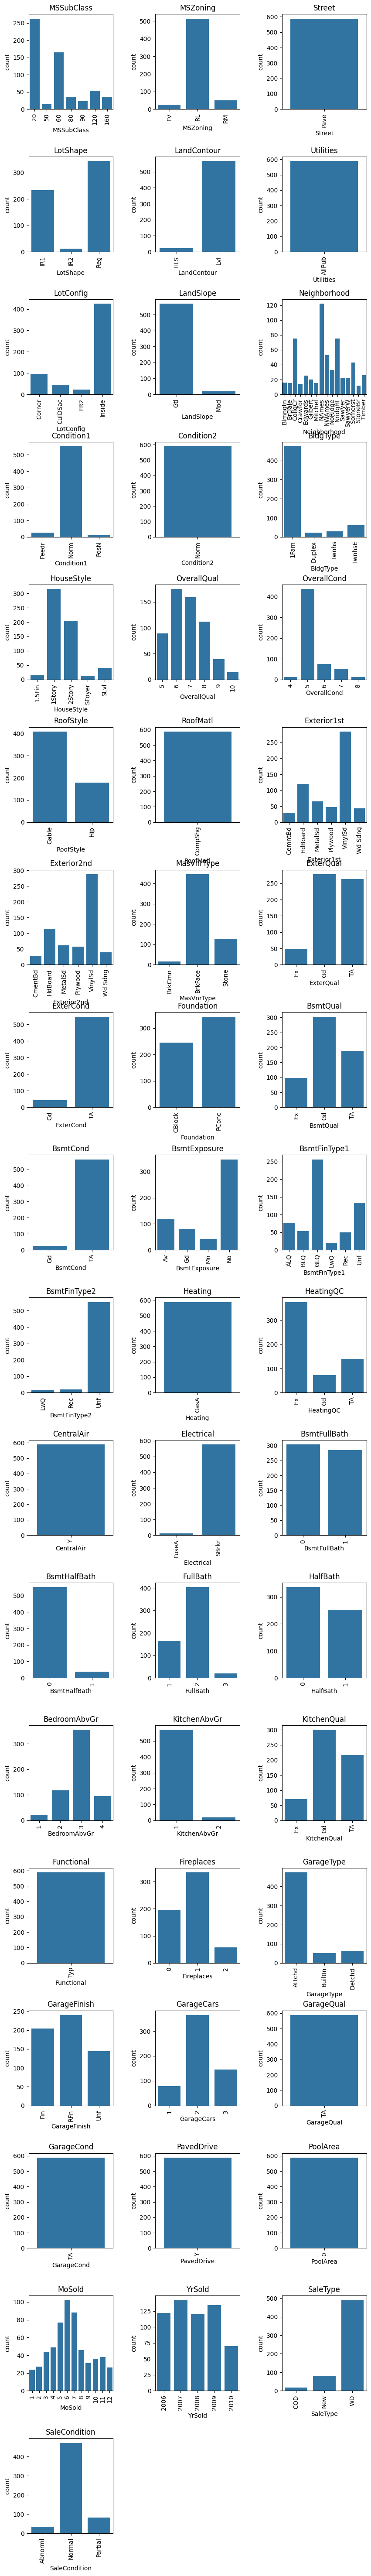

In [23]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [24]:
cat_low_var_cols = ['MSSubClass', 'ExterCond', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']

**Drop columns with low variance**

In [25]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

### 6. Remove Duplicates

In [26]:
df.duplicated().sum()

np.int64(0)

### 7. Data Splitting

In [27]:
X, y = df.iloc[:, :-1], df.iloc[:, -1:]

In [36]:
pd.DataFrame({"Dtype":X.dtypes}).T

,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
Dtype,category,float64,category,category,category,category,category,category,category,float64,float64,category,category,category,category,float64,category,category,category,category,category,float64,float64,float64,category,float64,float64,float64,category,category,category,category,category,float64,category,category,float64,category,category,float64,float64,float64,category,category


### 8. Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
num_cols = X.select_dtypes("number").columns 

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

### 9. Encoding

- **Nominal/Ordinal filtering**

In [41]:
ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Foundation', 'GarageType', 'GarageFinish']

In [42]:
nominal_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
pd.DataFrame(X[nominal_cols].nunique()).T

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType
0,3,3,2,4,16,5,2,6,6,3


In [43]:
binary_cols = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd']
onehot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'RoofStyle', 'MasVnrType']

- **Ordinal Encoding**

In [44]:
labels = {
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},  
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Foundation': {'PConc': 4, 'CBlock': 3, 'BrkTil': 2, 'Slab': 1, 'Stone': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
}

In [45]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

- **Onehot Encoding**

In [48]:
from category_encoders import OneHotEncoder

In [49]:
onehot_encoder = OneHotEncoder(cols=onehot_cols)
X = onehot_encoder.fit_transform(X)

In [47]:
! pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - --------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\yousef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34
   ------------------------------------ --- 8.9/9.8 MB 27.0 kB/s eta 0:00:34

- **Binary Encoding**

In [50]:
from category_encoders import BinaryEncoder

In [51]:
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [52]:
X

,MSZoning_1,MSZoning_2,MSZoning_3,LotFrontage,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_1,RoofStyle_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,MasVnrType_1,MasVnrType_2,MasVnrType_3,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
0,1,0,0,0.345588,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,7,5,0.916667,0.883333,1,0,0,0,1,0,0,1,1,0,0,0.299694,3,4,4,1,6,0.317839,0.079565,0.349266,4,0.197668,0.456197,0.454352,1,2,1,3,3,0.625,0,5,0.901408,2,2,0.491379,0.000000,0.301235,2,2008
2,1,0,0,0.389706,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,7,5,0.892857,0.866667,1,0,0,0,1,0,0,1,1,0,0,0.247706,3,4,4,2,6,0.218796,0.230208,0.376489,4,0.231585,0.462607,0.490210,1,2,1,3,3,0.375,1,5,0.873239,2,2,0.556034,0.000000,0.207407,9,2008
4,1,0,0,0.625000,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,8,5,0.880952,0.833333,1,0,0,0,1,0,0,1,1,0,0,0.535168,3,4,4,3,6,0.294879,0.259912,0.472193,4,0.350821,0.562500,0.684595,1,2,1,4,3,0.750,1,5,0.859155,2,3,0.801724,0.400000,0.414815,12,2008
6,1,0,0,0.492647,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,8,5,0.928571,0.916667,1,0,0,0,1,0,0,1,0,1,0,0.284404,3,4,5,3,6,0.616320,0.168147,0.702308,4,0.641759,0.000000,0.446803,1,2,0,3,3,0.500,1,5,0.915493,2,2,0.586207,0.531250,0.281481,8,2007
7,1,0,0,0.507353,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,7,6,0.559524,0.383333,1,0,0,1,0,0,1,0,0,1,0,0.366972,2,3,4,2,5,0.386719,0.114574,0.456029,4,0.330684,0.525107,0.633640,1,2,1,3,2,0.500,2,5,0.478873,2,2,0.422414,0.489583,1.000000,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1,0,0,0.507353,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,5,7,0.428571,0.200000,1,0,0,1,0,0,1,0,1,0,0,0.288991,2,3,3,1,3,0.266967,0.315608,0.490483,2,0.373609,0.000000,0.208068,0,1,0,3,2,0.375,0,5,0.323944,1,1,0.237069,0.543750,0.192593,4,2010
1447,1,0,0,0.566176,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,8,5,0.821429,0.766667,1,0,0,0,1,0,0,1,1,0,0,0.669725,3,4,4,1,6,0.485763,0.074791,0.504094,4,0.390567,0.464744,0.633640,1,2,1,3,3,0.625,1,5,0.788732,2,2,0.500000,0.000000,0.320988,12,2007
1451,1,0,0,0.536765,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,8,5,0.976190,0.983333,1,0,1,1,0,1,1,0,0,1,0,0.296636,3,4,4,1,1,0.000000,0.834372,0.654243,4,0.580286,0.000000,0.392074,0,2,0,3,4,0.500,1,5,0.971831,3,3,0.806034,0.000000,0.177778,5,2009
1452,0,0,1,0.000000,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,5,5,0.940476,0.916667,1,0,0,0,1,0,0,1,1,0,0,0.122324,2,4,4,4,6,0.246258,0.000000,0.217833,3,0.312136,0.000000,0.153338,1,1,0,2,2,0.250,0,5,0.929577,3,2,0.466595,0.000000,0.138272,5,2006
